# Final Tutorial
## Jeong Hyun Lim, Wei-Hsuan Lin, Connor Secen

Today we take you on a beginner's tutorial on Data Science.
First we will import a couple things to get us started, as well as the file that contains the data.
We will be using pandas' DataFrame to keep our data organized. For more information on DataFrames, go here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [1]:
import pandas as pd #used to store data in tables
import scipy.stats as stats #used to do some stats!
import folium
import matplotlib.pyplot as plt #used to create plots

#we create the DataFrame object, naming it table, from the excel file in local source
table = pd.read_excel('salGuide2017.xlsx')

Here is a look at our imported excel file in DataFrame form.

In [2]:
table #call the object to view

,EMPLOYEE,DEPARTMENT,TITLE,SALARY
0,"A'Hearn, Michael F.",CMNS-Astronomy,Res Prof,135810.69
1,"Aarhus, William H",SVPAAP-Teaching and Learning Transformation Ce...,Manager,75750.00
2,"Abadinsky, Alisa Michelle",VPAF-Comptroller,Bursar,140000.00
3,"Abadir, Miranda",ARHU-National Foreign Language Center,Fac Res Asst,80780.64
4,"Abarca, Francisco A",VPAF-FM-B&LM-Building & Landscape Maintenance-...,Housekeeper,23826.00
5,"Abarcar, Arri J",BSOS-College of Behavioral & Social Sciences,Accounting Assoc,40600.00
6,"Abasi, Ali Reza","ARHU-School of Languages, Literatures, and Cul...",Assoc Prof,76041.79
7,"Abban, Kofi",VPSA-Transportation Services,MT Maint Aide II,29791.63
8,"Abban, Samuel O.",CMNS-Entomology,Fac Spec,49962.44
9,"Abbas, Hussain",INFO-College of Information Studies,Coordinator,54961.42


But wait there's a problem! Some of the names are repeated in this table. Also, the column 'DEPARTMENT' has 2 parts. No worries, this is all a part of data curation, where we must first obtain and organize the data before using it. Below, we are creating another DataFrame from the original DataFrame table.
For more information on loops in python, go here: https://www.python-course.eu/python3_for_loop.php.
For more info on usage of .loc and .iloc, go here: https://pandas.pydata.org/pandas-docs/stable/indexing.html.
If you are still confused with how to extract data from an Excel file, feel free to visit this site: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html.

In [3]:
#calling the new DataFrame salary and setting its columns. DPT is the first part of DEPARTMENT
#and DPT_det is the second part, which provides detail to DPT.
salary = pd.DataFrame(columns=['EMPLOYEE','DEPARTMENT','DEP_COUNT','TITLE','SALARY','DPT','DPT_det'])

#initializing a variable that will keep track of row # on salary. This will be important when 
#we iterate through table and transitions its values to salary.
sal_ind = 0

#this for loop goes from 0 to the number of rows in table
num_rows = len(table.index)
for i in range(0, num_rows):
    #the data is in alphabetical order so we can assume repeat names are close to each other.
    #I check to see if the previous row's name matches the current row's name.
    #If it does I will go here
    if (sal_ind != 0 and salary.loc[sal_ind-1, 'EMPLOYEE'] == table.loc[i, 'EMPLOYEE']):
        #because there is a repeat name, we have to combine the 2 rows together.
        #because there might be different TITLES and DEPARTMENT, we update TITLE and DEPARTMENT
        #if the salary is greater. We are assuming that the repeat with the bigger salary
        #contains the main job.
        if (salary.loc[sal_ind-1, 'SALARY'] < table.iloc[i][3]):
            salary.loc[sal_ind-1, 'TITLE'] = table.iloc[i][2]
            salary.loc[sal_ind-1, 'DEPARTMENT'] = table.iloc[i][1]
            #splitting DEPARTMENT into 2 parts and storing in salary
            dptpair = table.iloc[i][1].split('-')
            salary.loc[sal_ind-1, 'DPT'] = dptpair[0]
            salary.loc[sal_ind-1, 'DPT_det'] = dptpair[1]
        #SALARY gets updated (added to prev amt)
        salary.loc[sal_ind-1, 'SALARY'] += table.iloc[i][3]
        #this is to keep track of how many repeats of the same employee we saw
        salary.loc[sal_ind-1, 'DEP_COUNT'] += 1
    #If not, I will go here
    else:
        #it's not a repeat so we are just placing the row at position i into salary
        salary.loc[sal_ind, 'EMPLOYEE'] = table.iloc[i][0]
        salary.loc[sal_ind, 'DEPARTMENT'] = table.iloc[i][1]
        dptpair = table.iloc[i][1].split('-')
        salary.loc[sal_ind, 'DPT'] = dptpair[0]
        salary.loc[sal_ind, 'DPT_det'] = dptpair[1]
        salary.loc[sal_ind, 'TITLE'] = table.iloc[i][2]
        salary.loc[sal_ind, 'SALARY'] = table.iloc[i][3]
        salary.loc[sal_ind, 'DEP_COUNT'] = 1
        #increment the index of salary so we can store the next new row
        sal_ind+=1

Here is a look at our new DataFrame, salary.

In [4]:
salary

,EMPLOYEE,DEPARTMENT,DEP_COUNT,TITLE,SALARY,DPT,DPT_det
0,"A'Hearn, Michael F.",CMNS-Astronomy,1,Res Prof,135811,CMNS,Astronomy
1,"Aarhus, William H",SVPAAP-Teaching and Learning Transformation Ce...,1,Manager,75750,SVPAAP,Teaching and Learning Transformation Center
2,"Abadinsky, Alisa Michelle",VPAF-Comptroller,1,Bursar,140000,VPAF,Comptroller
3,"Abadir, Miranda",ARHU-National Foreign Language Center,1,Fac Res Asst,80780.6,ARHU,National Foreign Language Center
4,"Abarca, Francisco A",VPAF-FM-B&LM-Building & Landscape Maintenance-...,1,Housekeeper,23826,VPAF,FM
5,"Abarcar, Arri J",BSOS-College of Behavioral & Social Sciences,1,Accounting Assoc,40600,BSOS,College of Behavioral & Social Sciences
6,"Abasi, Ali Reza","ARHU-School of Languages, Literatures, and Cul...",1,Assoc Prof,76041.8,ARHU,"School of Languages, Literatures, and Cultures"
7,"Abban, Kofi",VPSA-Transportation Services,1,MT Maint Aide II,29791.6,VPSA,Transportation Services
8,"Abban, Samuel O.",CMNS-Entomology,1,Fac Spec,49962.4,CMNS,Entomology
9,"Abbas, Hussain",INFO-College of Information Studies,1,Coordinator,54961.4,INFO,College of Information Studies


Now that we cleaned up the data a bit, let's have some fun!
Below is the code ran to see the average salary per Department. For more info on groupby, go here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

In [5]:
#sometimes columns do not save as the correct type, so we are making sure that SALARY is float.
salary['SALARY'] = salary['SALARY'].astype(float)
#we are creating another DataFrame, by_dep, by using .groupby. .groupby will group by the column
#provided, which is 'DPT' (Department) in this case. The corresponding column values we want 
#are the salary averages.
by_dep = salary.groupby('DPT', as_index=False)['SALARY'].mean()
#name the columns.
by_dep.columns = ['department', 'avgSal']
#print out the DataFrame
print(by_dep)

   department         avgSal
0        AGNR   66187.190348
1        ARCH   65951.314000
2        ARHU   67039.937263
3        BMGT  112636.670989
4        BSOS   84426.541989
5        CMNS   89597.505948
6         DIT   92767.359811
7        EDUC   72724.846263
8        ENGR   89166.741475
9        EXST   26607.435846
10       GRAD   75797.197895
11       INFO   77712.273026
12       IRPA   84998.202143
13       JOUR   57944.840241
14       LIBR   61060.950789
15       PLCY   87022.620706
16       PRES   93373.166990
17       SPHL   74051.973348
18     SVPAAP   76490.259184
19       UGST   63587.062609
20        USG   71248.384713
21       VPAF   64484.760145
22        VPR   89001.480049
23       VPSA   51507.341107
24       VPUR   94091.163448


This is nice, but I feel like we can show these values in a better way. Let's do a bar graph! For more info on graphs, go here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

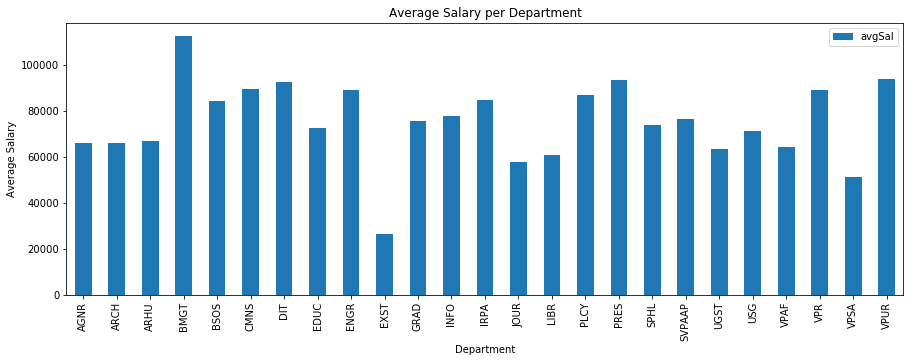

In [6]:
#using .plot, we are doing a bar graph setting the x value to department and y to the average
#salary. I increased the size a bit so we can see it better.
by_dep.plot(kind = 'bar', x = 'department', y = 'avgSal', figsize=(15,5))
#just creating labels for the graph.
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary per Department')
#now to show it off
plt.show()

Here's a boxplot of the same thing. Boxplots are useful to see the distribution. You can right click the graph to open in a new tab if it's too hard to see. Notice that there are examples of salaries within some departments that are much greater than the rest of the salaries in the same dept. These might be potential outliers. The dot at the $600,000 mark on DPT PRES? That's President Loh.

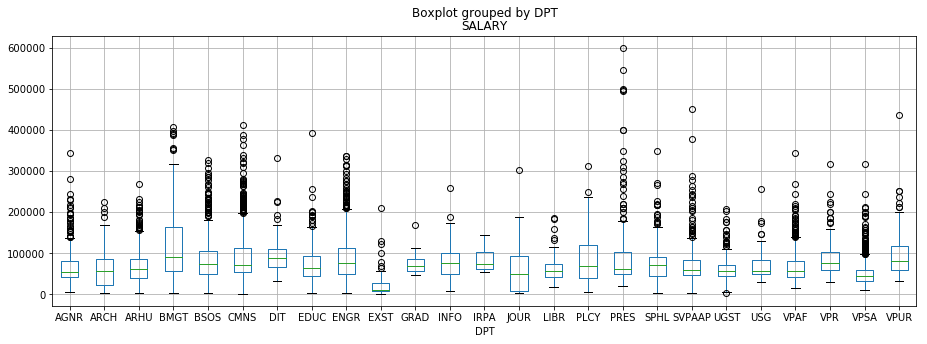

In [7]:
#notice I use DataFrame salary here. That's because I want to plot all salary occurences of each dept
#to show the distribution.
salary.boxplot('SALARY', by='DPT', figsize=(15, 5))
plt.show()

We can also do the same thing with TITLE. However, there are so many job titles, it's best not to use a bar graph. Instead, we show how to look up salary averages for each job title individually. By using .contains, we can look up similar job titles together.

In [8]:
#create a new DataFrame, by_title, using .groupby to group by TITLE. Calculate the average values
#once again.
by_title = salary.groupby('TITLE', as_index=False)['SALARY'].mean()
by_title.columns = ['title', 'avgSal']

### Search based on "Coach" in the Title
We see different kinds of Coaches, and averaging all Coaches' salary results in $258,038

In [9]:
#here we grab data only from titles that contain the string "Coach" then print out the table.
print(by_title.loc[by_title.iloc[:,0].str.contains(r'Coach')].to_string(index=False))
print('\n')
print("avg of all 'Coach' salary")
#here we average all Coaches' salaries
print(by_title.loc[by_title.iloc[:,0].str.contains(r'Coach')].mean().values)

title         avgSal
   Asst Coach   74241.196167
Asst Coach FB  263125.000000
        Coach  257275.000000
   Head Coach  196830.107647
Head Coach BB  498721.170000


avg of all 'Coach' salary
[ 258038.49476275]


### Search based on "Prof" in the Title 
Here we see MANY different kinds of Professors. Seems like too much, perhaps it's better to just look at the average of all Professor salaries which is $132,554. Hmmm, the Coaches definitely seem to be getting paid more than our Professors (smh).

In [10]:
#here we grab data only from titles that contain the string "Prof" then print out the table.
print(by_title.loc[by_title.iloc[:,0].str.contains(r'Prof')].to_string(index=False))
print('\n')
print("avg of all 'Prof' salary")
#here we average all Professors' salaries
print(by_title.loc[by_title.iloc[:,0].str.contains(r'Prof')].mean().values)

title         avgSal
            Adjunct Assoc Prof   28293.750000
             Adjunct Asst Prof   37259.895000
                  Adjunct Prof   25875.980000
          Asoc Prof &Assoc Dir   97583.833333
               Assoc Clin Prof  107602.739565
                    Assoc Prof  112283.907824
       Assoc Prof & Assoc Dean  165667.922500
              Assoc Prof & Dir  138425.414000
         Assoc Prof & Exec Dir  131148.135000
             Assoc Prof &Chair  158023.000000
        Assoc Prof Assoc Chair  114820.264000
           Assoc Prof Emeritus   13646.380000
                Assoc Res Prof   94500.202000
                Asst Clin Prof   69638.656667
                     Asst Prof  101803.735473
                Asst Rsch Prof   79570.514730
                     Clin Prof  148534.457500
        College Park Professor   34385.210000
                Dist Univ Prof  217870.493400
          Dist Univ Prof & Dir  322989.460000
          Dist Univ Prof Chair  321588.190000
        Dist 

### Seeing that difference in salary between job titles, I wonder if there are significant differences in salary between departments as well.
### Let's do a hypothesis test using one-way ANOVA. One-way ANOVAs can show whether or not the differences between group means are significant. By doing this test, we can see how significant salary differences are between departments.

To do a hypothesis test, we need a significance level. Usually .05 will work and what this means is that the p-value we obtain from the one-way ANOVA should be less than .05 if we are to reject the NULL hypothesis. The NULL hypothesis here is that there are no significant differences in salaries between departments. We think there is, so we want a small p-value to reject the hypothesis.

In [11]:
#creating a new DataFrame, setting the different departments as columns.
dept_sal = pd.DataFrame(columns=by_dep['department'])
sal_ind = 0

#this for loop iterates through DataFrame salary, adding in salaries to the new DataFrame, dept_sal,
#for corresponding departments.
num_rows2 = len(salary.index)
for i in range(0, num_rows2):
    dept_sal.loc[i, salary.iloc[i][5]] = salary.iloc[i][4]

In [12]:
#here we create external lists for each department, deleting all NaN values. 
#For example, AGNR should contain every salary of every employee in AGNR.
AGNR = [x for x in dept_sal['AGNR'] if str(x) != 'nan']
ARCH = [x for x in dept_sal['ARCH'] if str(x) != 'nan']
ARHU = [x for x in dept_sal['ARHU'] if str(x) != 'nan']
BMGT = [x for x in dept_sal['BMGT'] if str(x) != 'nan']
BSOS = [x for x in dept_sal['BSOS'] if str(x) != 'nan']
CMNS = [x for x in dept_sal['CMNS'] if str(x) != 'nan']
DIT = [x for x in dept_sal['DIT'] if str(x) != 'nan']
EDUC = [x for x in dept_sal['EDUC'] if str(x) != 'nan']
ENGR = [x for x in dept_sal['ENGR'] if str(x) != 'nan']
EXST = [x for x in dept_sal['EXST'] if str(x) != 'nan']
GRAD = [x for x in dept_sal['GRAD'] if str(x) != 'nan']
INFO = [x for x in dept_sal['INFO'] if str(x) != 'nan']
IRPA = [x for x in dept_sal['IRPA'] if str(x) != 'nan']
JOUR = [x for x in dept_sal['JOUR'] if str(x) != 'nan']
LIBR = [x for x in dept_sal['LIBR'] if str(x) != 'nan']
PLCY = [x for x in dept_sal['PLCY'] if str(x) != 'nan']
PRES = [x for x in dept_sal['PRES'] if str(x) != 'nan']
SPHL = [x for x in dept_sal['SPHL'] if str(x) != 'nan']
SVPAAP = [x for x in dept_sal['SVPAAP'] if str(x) != 'nan']
UGST = [x for x in dept_sal['UGST'] if str(x) != 'nan']
USG = [x for x in dept_sal['USG'] if str(x) != 'nan']
VPAF = [x for x in dept_sal['VPAF'] if str(x) != 'nan']
VPR = [x for x in dept_sal['VPR'] if str(x) != 'nan']
VPSA = [x for x in dept_sal['VPSA'] if str(x) != 'nan']
VPUR = [x for x in dept_sal['VPUR'] if str(x) != 'nan']

#now we can perform the one-way ANOVA.
stats.f_oneway(AGNR,ARCH,ARHU,BMGT,BSOS,CMNS,DIT,EDUC,ENGR,EXST,GRAD,INFO,IRPA,JOUR,LIBR,PLCY,PRES,SPHL,SVPAAP,UGST,USG,VPAF,VPR,VPSA,VPUR)

F_onewayResult(statistic=46.397244197332874, pvalue=6.4419586180060231e-208)

In the results of the one-way ANOVA, we see 2 values, statistic and pvalue. statistic is the F-value, which is used to find the pvalue. Because pvalue is given, we can ignore that for now. Notice that the pvalue is significantly smaller than our significance level of .05. This means that we reject the NULL hypothesis that there are no significant differences in salaries between departments. So as we suspected, there appears to be salary differences between the departments. For more info on one-way ANOVA go here: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

Let's take a different look at the differences in salary between departments. This time, we will plot the data out on a map! But first, we need to do a couple things: setting up the DataFrame to be used and implementing hash to plot out locations based on the department information.

In [13]:
#creating a DataFrame, map, that we will use to visualize average salary in each department.
map = salary.groupby('DEPARTMENT', as_index=False)['SALARY'].mean()

In [16]:
#reading an excel that contains corresponding longitude and latitude for each department.
loc = pd.read_excel('lan lat.xlsx')
dict = {}
# go through the table based on the max length, stop if the length of the table is reached
for i in range (0,len(loc.index)):
    #use hash to store every information such as department name as the key and the array of coordinates as the value;
    #so whenever the circle is marked on the map, the array directly indicates the location on the map.
    dict[loc.iloc[i][0]] = [loc.iloc[i][1],loc.iloc[i][2]]

Having all these points allows us to view the data with a map representation rather than in a table or on a graph. This representation will help give us more information on how salary is distributed among all departments.
Here we begin to check the total salary of each department and add them to the map. For viewing ease, we add a different color marker for each salary level!

In [24]:
#the map is displayed with the center of (38.985, -97.94), and zoomed properly at size 15
campus = folium.Map(location=[38.985, -76.94], zoom_start=15)
#go through the salary list and mark with color if the salary of the department is greater than a certain amount,
#the color of the circle becomes gradually lighter to show the contrasting between the salary each department made. 
for index, row in map.iterrows():
    #if a department is earning at least on average 100k each person, then it gets all the colors
    if(row['SALARY'] >= 100000):
        folium.CircleMarker(location=dict[row['DEPARTMENT']],color='brown',radius=13).add_to(campus)
    #if a department is earning at least on average of 80k each person, then it gets all the colors except what the 100ks make
    if(row['SALARY'] >= 80000):
        folium.CircleMarker(location=dict[row['DEPARTMENT']],color='blue',radius=11).add_to(campus)
    #if a department is earning at least on average of 70k each person, then it gets all the colors except what 80k and 100k make
    if(row['SALARY'] >= 70000):
        folium.CircleMarker(location=dict[row['DEPARTMENT']],color='green',radius=9).add_to(campus)
    #if a department is earning at least on average of 60k each person, then it gets all the colors except what 70k, 80k, and 100k make
    if(row['SALARY'] >= 60000):
        folium.CircleMarker(location=dict[row['DEPARTMENT']],color='yellow',radius=7).add_to(campus)
    #if a department is earning at least on average of 50k each person, it will only be colored with 2 light colors
    if(row['SALARY'] >= 50000):
        folium.CircleMarker(location=dict[row['DEPARTMENT']],color='orange',radius=5).add_to(campus)
    #if a department is earning at most on average of 50k each person, it will only be colored with 1 light color
    if(row['SALARY'] < 50000):
        folium.CircleMarker(location=dict[row['DEPARTMENT']],color='red',radius=3).add_to(campus)
campus

### Average salary differences between departments visualized on a map

Compared to looking at the data through graphs and statistics, looking at a map is just visually more attractive. Here, we have plotted out circles for each department, with the layers of the circle representing greater average salaries. The more layers a circle has, the greater the average salary is for that department. By looking at the data through this visual method, we can easily see where the biggest average salaries are. By zooming in on the map, we can see what building and what department they are a part of.

Here is the corresponding layer color for each salary level:<br />
red < \$50,000 <br />
orange >= \$50,000 <br />
yellow >= \$60,000 <br />
green >= \$70,000 <br />
blue >= \$80,000 <br />
brown >= \$100,000

One trend we can see at first glance is that most departments are making a total of between \$70,000 and \$80,000 a year, however, spread throughout the university, it can clearly be seen that there are a few departments that have salary averages above \$100,000 a year.

Though we have shown in many ways the apparent differences in salary averages between departments, we have not yet asked why? We can see that departments like Computer Science, Economics, Business, and Physics are among the top in average salaries based on the map. Perhaps they have greater salaries because the fields are more relevant than other departments in the world today. Or perhaps they are more skill based, and therfore offer a greater salary for knowledge and experience. There could be many possible reasons why we are seeing these differences. So, from this basic tutorial, the next step is to collect more data for analysis. For our tutorial, we worked with variables such as salary, department, and title. To continue off, we could query and add in more information for the employees in the data, such as how long they have worked at UMD, their gender, as well as their initial hire date. The point is, having more information gives us a greater opportunity to find relationships.

Hopefully you were able to pick up a lot of information from this tutorial, and further advance the findings we have seen today!

For more information about creating a map: https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

Here is also more information about using data structures like dictionaries and lists: https://www.python-course.eu/dictionaries.php